# Car Selling Price Prediction
Exploratory Data Analysis & Linear Regression

## 1. Importing Libraries & Data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("cars.csv")
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,15


## 2. Initial Data Overview

In [6]:
df.shape

(8128, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   8128 non-null   int64  
 1   km_driven       8128 non-null   int64  
 2   fuel            8128 non-null   object 
 3   seller_type     8128 non-null   object 
 4   transmission    8128 non-null   object 
 5   owner           8128 non-null   object 
 6   mileage         7907 non-null   float64
 7   engine          7907 non-null   float64
 8   max_power       7912 non-null   float64
 9   seats           7907 non-null   float64
 10  car_brand_name  8128 non-null   object 
 11  car_age         8128 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [8]:
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
car_brand_name      0
car_age             0
dtype: int64

In [9]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719,8.195989
std,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588,4.044249
min,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,2.000000
25%,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,5.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,7.000000
75%,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,11.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,39.000000


## 3. Basic Statistics & Outliers

In [10]:
print(f"min age: {df['car_age'].min()}, max age: {df['car_age'].max()}")
print(f"min price: {df['selling_price'].min()}, max price: {df['selling_price'].max()}")
print(f"min seats: {df['seats'].min()}, max seats: {df['seats'].max()}")

min age: 2, max age: 39
min price: 29999, max price: 10000000
min seats: 2.0, max seats: 14.0


## 4. Exploratory Data Analysis (EDA)

<Axes: xlabel='selling_price'>

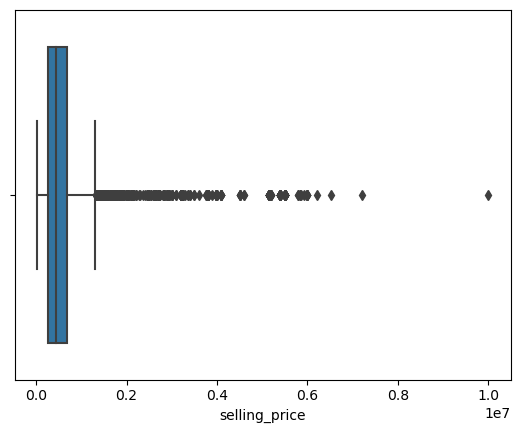

In [11]:
sns.boxplot(data=df, x="selling_price")

<Axes: xlabel='mileage'>

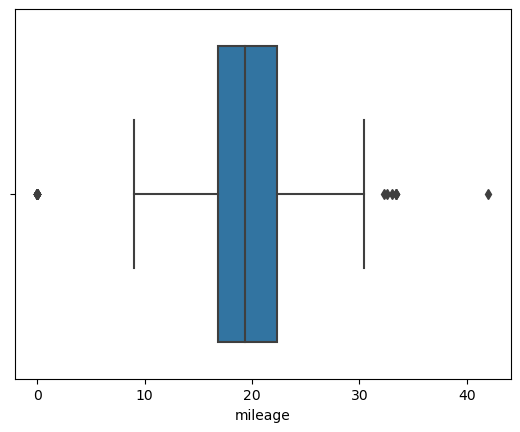

In [12]:
sns.boxplot(data=df, x="mileage")

<Axes: xlabel='max_power', ylabel='Count'>

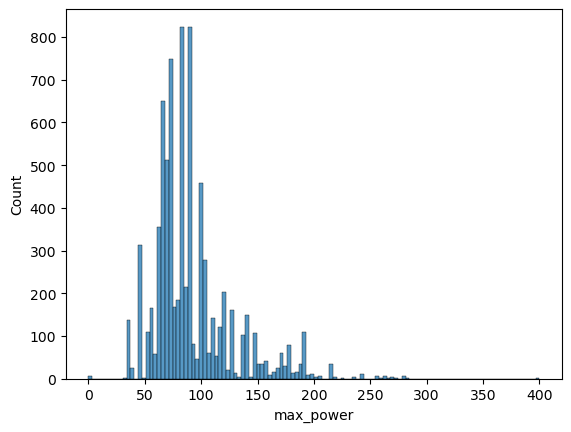

In [13]:
sns.histplot(data=df, x="max_power")

<Axes: xlabel='car_age', ylabel='Count'>

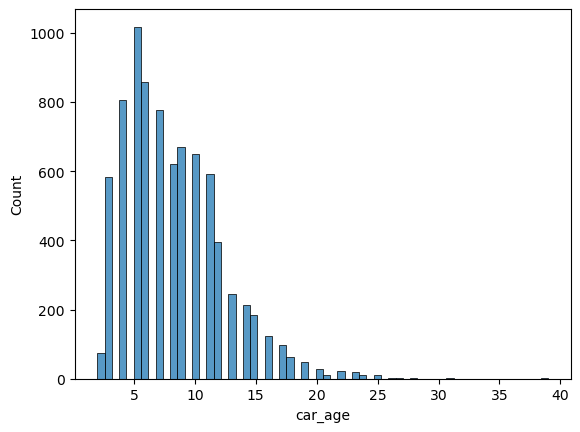

In [14]:
sns.histplot(data=df, x="car_age")

<Axes: xlabel='fuel', ylabel='count'>

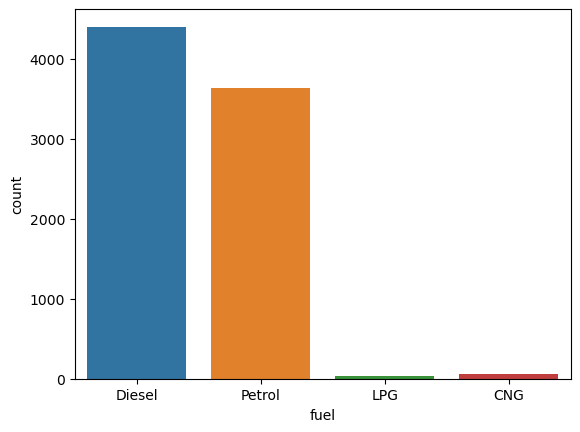

In [15]:
sns.countplot(data=df, x="fuel")

<Axes: xlabel='transmission', ylabel='count'>

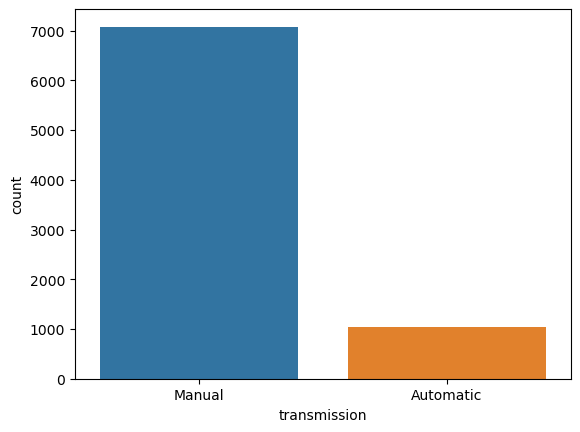

In [16]:
sns.countplot(data=df, x="transmission")

<Axes: xlabel='owner', ylabel='selling_price'>

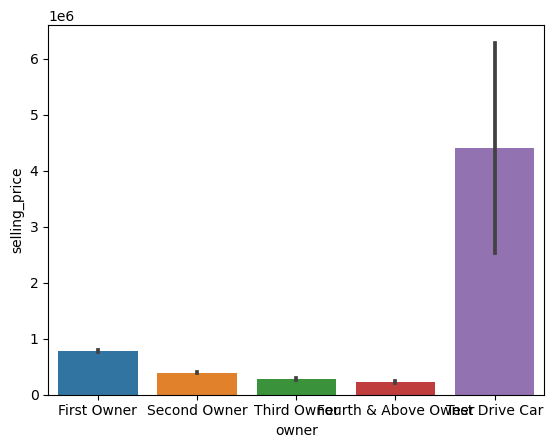

In [17]:
sns.barplot(data=df, y="selling_price", x="owner")

<Axes: xlabel='max_power', ylabel='selling_price'>

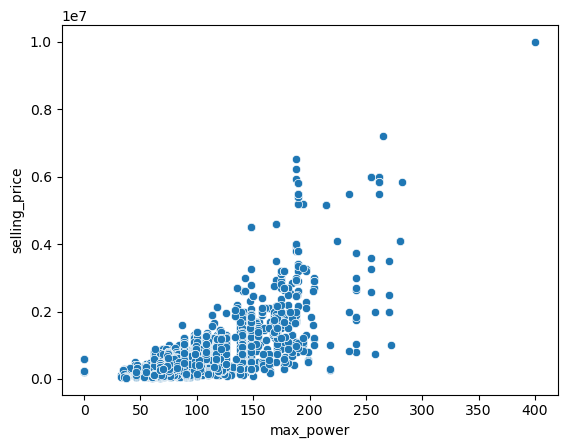

In [18]:
sns.scatterplot(data=df, x="max_power", y="selling_price")

<Axes: >

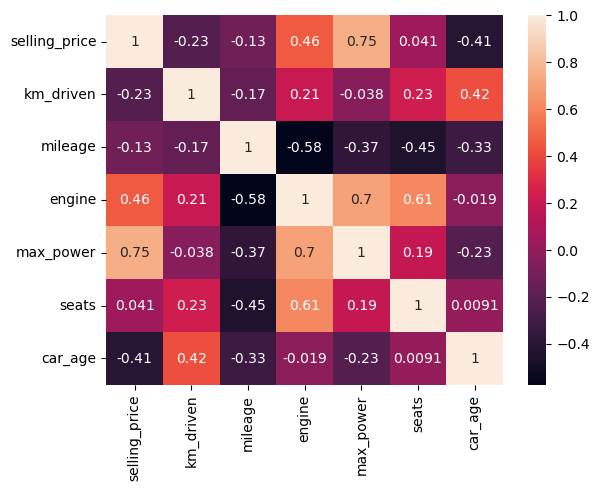

In [19]:
sns.heatmap(df.corr(), annot=True)

## 5. Feature Engineering & Preprocessing

In [20]:
df.drop(columns='car_brand_name', inplace=True)
df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['max_power'].fillna(df['max_power'].mean(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

df['fuel'] = df['fuel'].map({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})
df['seller_type'] = df['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})
df['owner'] = df['owner'].map({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, "Test Drive Car": 4})

## 6. Model Building – Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = df["selling_price"]
x = df.drop("selling_price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)



In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
print('Coefficients:\n', model.coef_)

Coefficients:
 [-1.59675832e+00 -4.57763195e+04  9.35710042e+04  4.69368413e+05
  3.03843795e+03  1.58403290e+04  1.08983766e+02  1.33765632e+04
 -3.70363012e+04 -3.18286549e+04]


## 7. Model Evaluation

In [25]:
predictions = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 261782.72025452997
MSE: 181326721457.55624
RMSE: 425824.7543973415


## 8. Predicting a New Car Price

In [26]:
new_car = [[73000, 0, 0, 0, 1, 45, 2775, 86, 2, 9]]
print("Predicted Price:", model.predict(new_car))

Predicted Price: [1155559.71309298]


*Author: Abderrahim Jridi  
LinkedIn: [linkedin.com/in/abderrahim-jridi](https://www.linkedin.com/in/abderrahim-jridi)*